In [1]:
# Import core libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Allow inline plotting in Jupyter Notebook
%matplotlib inline

# Set default Seaborn style
sns.set(style="whitegrid")

In [2]:
# Import ML models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train/test split and cross-validation utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Import metrics for evaluation
from sklearn.metrics import roc_auc_score, roc_curve


In [3]:
# Import GridSearchCV for hyperparameter optimization
from sklearn.model_selection import GridSearchCV

In [4]:
# Import library to save/export the trained model
from joblib import dump

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/MyDrive/CMP7005/

/content/drive/MyDrive/CMP7005


In [7]:
# Install necessary packages (uncomment if not already installed)
# !pip3 install streamlit
# !pip3 install scikit-learn
# !pip3 install pandas
# !pip3 install matplotlib
# !pip3 install seaborn

In [8]:
import pandas as pd

In [9]:
# Load datasets from multiple monitoring stations
data1 = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
data2 = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
data3 = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
data4 = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
data5 = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
data6 = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
data7 = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
data8 = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
data9 = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
data10 = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
data11 = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
data12 = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [10]:
# Concatenate all 12 datasets into one unified DataFrame
data = pd.concat(
    [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12],
    ignore_index=True
)

In [11]:
# Save the merged dataset to a CSV file
with open("merged_dataset.csv", "w") as f:
    data.to_csv(f, index=False)

In [12]:
# Optional: Load the saved CSV from Google Drive
# This line is specific to Google Colab and assumes the file is uploaded to Drive
data = pd.read_csv("/content/drive/MyDrive/CMP7005/merged_dataset.csv")

In [13]:
# Display the first 5 rows of the merged dataset
data.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [14]:
# Basic information about the dataset
print("Dataset Shape:", data.shape)
print("Columns:", data.columns)
print("Data Types:\n", data.dtypes)
print("Missing Values:\n", data.isnull().sum())

Dataset Shape: (420768, 18)
Columns: Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
Data Types:
 No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object
Missing Values:
 No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


In [15]:
# Fill missing values in all numeric columns (float64 and int64) with the median of each column
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Check if the 'wd' (wind direction) column exists, then fill missing values with the most frequent value (mode)
if 'wd' in data.columns:
    data['wd'].fillna(data['wd'].mode().iloc[0], inplace=True)

# Remove any duplicate rows from the dataset
data.drop_duplicates(inplace=True)


In [16]:
# ---------------------------------------------------------
# Encoding Categorical Variable: 'wd' (Wind Direction)
# ---------------------------------------------------------

from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for converting categorical to numerical values

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the 'wd' column and transform it to numeric labels
# This replaces each unique category in 'wd' with an integer value
data['wd'] = label_encoder.fit_transform(data['wd'])

# Print the unique encoded values in the 'wd' column
print(data['wd'].unique())


[ 6  3  7  5  1  0  4 13 11 15  9 14 10  2  8 12]


In [17]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Create a copy of the dataset to avoid modifying the original directly
data2 = data.copy()

In [19]:
# Define bins for categorizing PM2.5 levels and corresponding labels
bins = [0, 25, 50, 75, 100, 150, 200, 300]
labels = ['0-25', '25-50', '50-75', '75-100', '100-150', '150-200', '200-300']

In [20]:
# Use pd.cut() to categorize PM2.5 values into defined bins and assign labels
data['PM2.5_Binned'] = pd.cut(data['PM2.5'], bins=bins, labels=labels)

In [21]:
# Count the number of records in each PM2.5 category (bin)
bin_counts = data['PM2.5_Binned'].value_counts(sort=False)

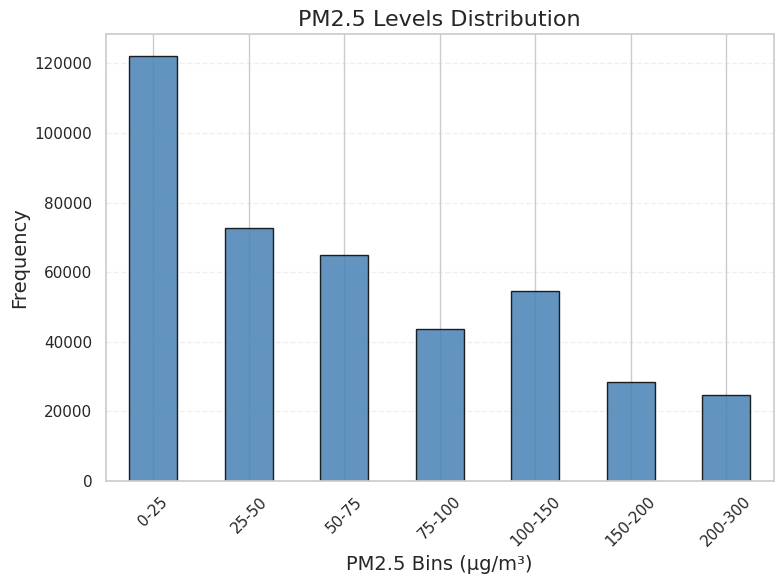

In [22]:
# Plot the frequency distribution of PM2.5 levels
plt.figure(figsize=(8, 6))
bin_counts.plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.85)

# Customize the plot with title and labels
plt.title('PM2.5 Levels Distribution', fontsize=16)
plt.xlabel('PM2.5 Bins (µg/m³)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improve readability
plt.xticks(rotation=45)
plt.grid(alpha=0.3, linestyle='--', axis='y')
plt.tight_layout()

# Display the plot
plt.show()


In [23]:
# Check if there are any missing values in the 'PM2.5' or 'TEMP' columns
if data[['PM2.5', 'TEMP']].isnull().any().any():
    print("Dataset contains missing values. Filling them with mean values.")

    # Fill missing values in 'PM2.5' with the column mean
    data['PM2.5'].fillna(data['PM2.5'].mean(), inplace=True)

    # Fill missing values in 'TEMP' with the column mean
    data['TEMP'].fillna(data['TEMP'].mean(), inplace=True)


In [ ]:
# Create a hexbin plot to visualize the density of PM2.5 vs Temperature
plt.figure(figsize=(10, 6))

# Generate the hexbin plot
plt.hexbin(data['TEMP'], data['PM2.5'], gridsize=30, cmap='coolwarm', mincnt=1)

# Add a color bar to show the count of data points in each hex
cb = plt.colorbar()
cb.set_label('Counts')  # Label for the color bar

# Add titles and axis labels
plt.title("PM2.5 vs Temperature (Hexbin Visualization)", fontsize=16)
plt.xlabel("Temperature (°C)", fontsize=14)
plt.ylabel("PM2.5 (µg/m³)", fontsize=14)

# Add a grid for better readability
plt.grid(alpha=0.3)

# Display the plot
plt.show()



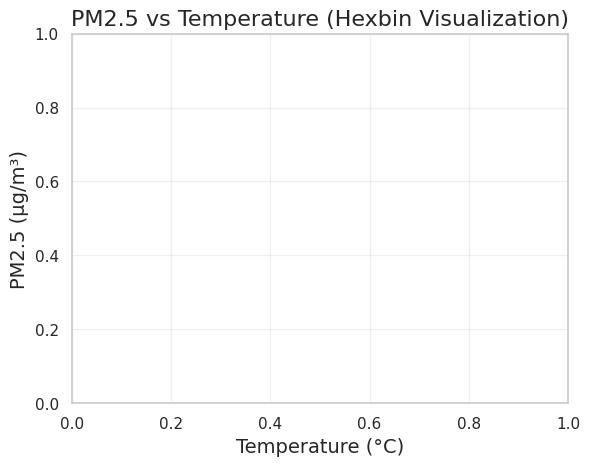

In [26]:
# Select only numeric columns from the dataset for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
corr_matrix = numeric_data.corr()


<Axes: >

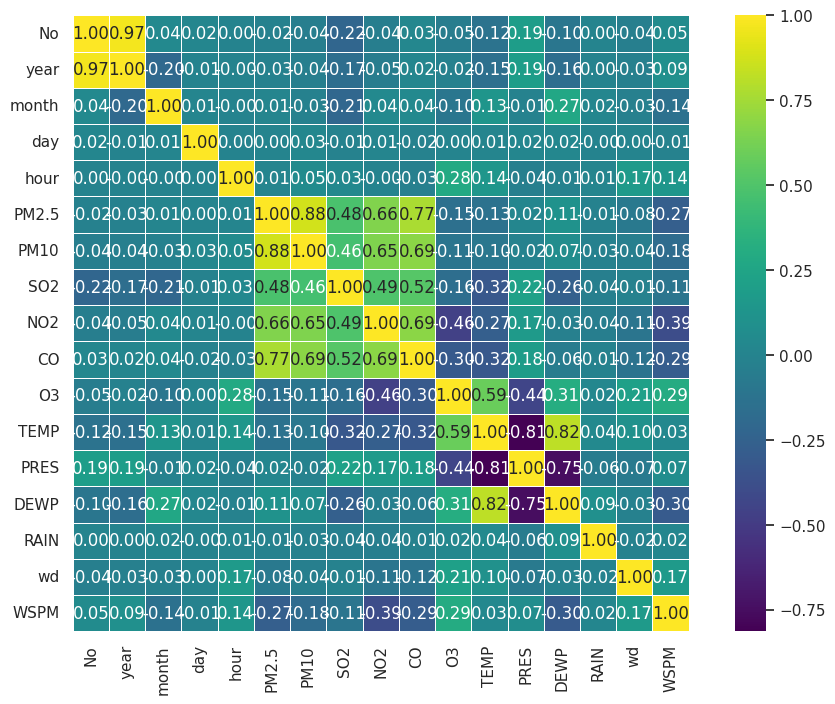

In [27]:
# Set the figure size for better visibility
plt.figure(figsize=(12, 8))

# Generate the heatmap using seaborn
sns.heatmap(
    corr_matrix,       # Correlation matrix as input
    annot=True,        # Annotate the heatmap with correlation values
    fmt=".2f",         # Format of the annotations (2 decimal places)
    cmap="viridis",    # Color map for styling
    cbar=True,         # Show color bar
    linewidths=0.5,    # Lines between cells
    square=True        # Make cells square-shaped
)


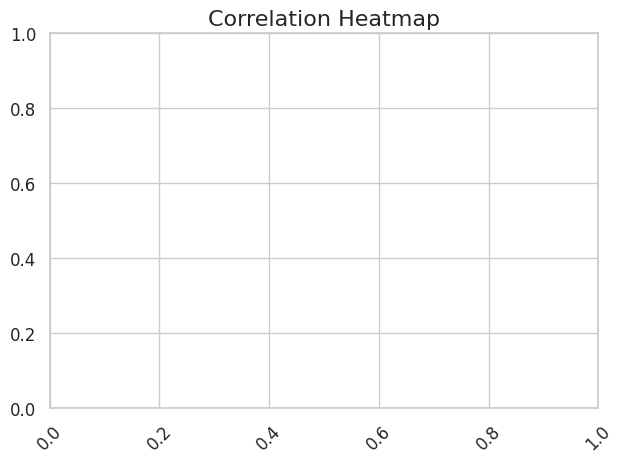

In [28]:
# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Customize tick labels for clarity
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

# Adjust layout to fit labels and titles
plt.tight_layout()

# Display the heatmap
plt.show()


In [ ]:
#!pip install ydata-profiling

#from ydata_profiling import ProfileReport
#profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)
#profile.to_file("dataset_report.html")

# Display the report in Jupyter Notebook (optional)
#profile.to_notebook_iframe()

In [30]:
# Define the list of features (independent variables) used to predict PM2.5
features = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'wd']

# Define the target variable (dependent variable) which we want to predict
target = 'PM2.5'


In [31]:
# Make a copy of the cleaned dataset to ensure the original remains unchanged
data = data2.copy()

# Create the feature matrix X with selected feature columns
X = data[features]

# Create the target vector y with the target variable
y = data[target]


In [32]:
# Import functions for splitting the dataset and scaling the features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
# Initialize the StandardScaler to normalize the feature values
scaler = StandardScaler()

# Fit the scaler on the feature matrix and transform it to get standardized values
X_scaled = scaler.fit_transform(X)


In [34]:
# Split the scaled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=70
)

In [35]:
# Import Linear Regression model and evaluation metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Create an instance of the Linear Regression model
model = LinearRegression()

# Train (fit) the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Use the trained model to predict target values for the test data
y_pred = model.predict(X_test)

In [38]:
# Calculate Mean Squared Error (MSE) and R-squared (R²) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1036.5906177916422
R-squared: 0.8388107668482139


In [39]:
# Set the style for seaborn plots to have a clean whitegrid background
sns.set_theme(style="whitegrid")

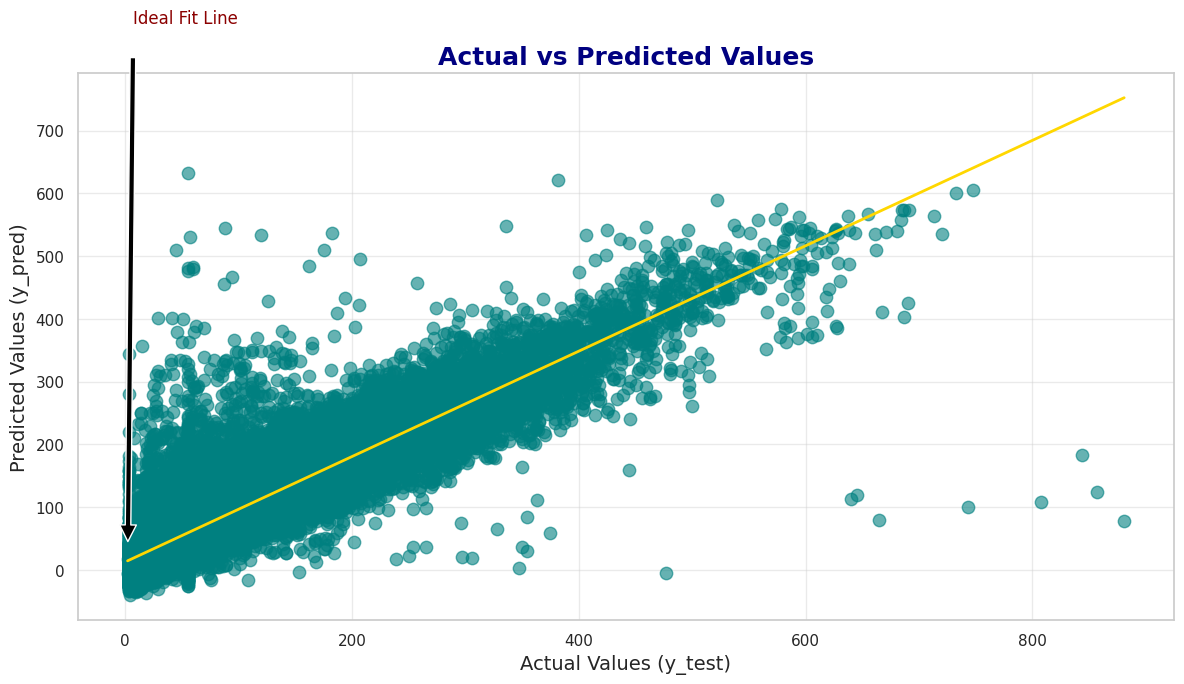

In [40]:
# Create a figure with the specified size
plt.figure(figsize=(12, 7))

# Create a regression plot to visualize the relationship between actual and predicted values
sns.regplot(x=y_test, y=y_pred,
            scatter_kws={'color': 'teal', 'alpha': 0.6, 's': 80}, # Customize scatter plot points
            line_kws={'color': 'gold', 'linewidth': 2}, # Customize regression line
            ci=None) # Don't display the confidence interval

# Add a title and labels to the plot
plt.title('Actual vs Predicted Values', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Actual Values (y_test)', fontsize=14)
plt.ylabel('Predicted Values (y_pred)', fontsize=14)

# Add an annotation to indicate where the ideal fit line is
plt.annotate('Ideal Fit Line', xy=(y_test.min(), y_test.min()),
             xytext=(y_test.min() + 5, y_test.max() - 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='darkred')

# Add a grid for better readability
plt.grid(alpha=0.4)

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


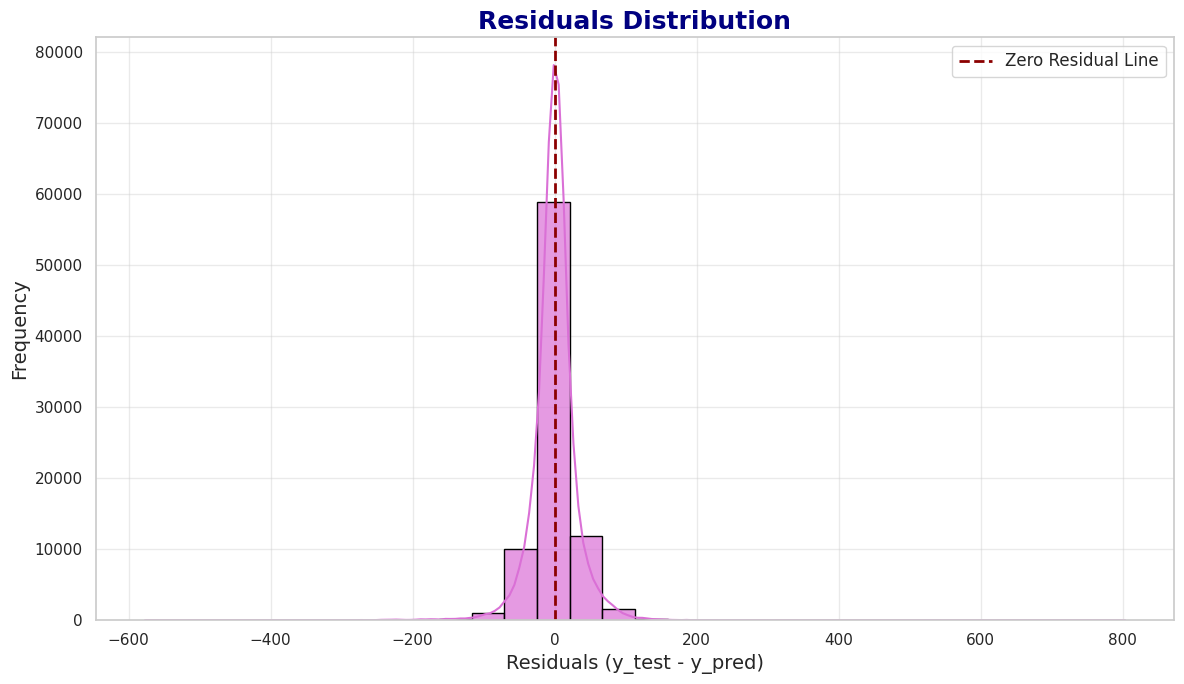

In [41]:
# Calculate residuals by subtracting predicted values from actual values
residuals = y_test - y_pred

# Create a figure with the specified size
plt.figure(figsize=(12, 7))

# Create a histogram of the residuals with a Kernel Density Estimate (KDE)
sns.histplot(residuals, kde=True, bins=30, color='orchid', edgecolor='black', alpha=0.7)

# Add a vertical line at zero to indicate the "zero residual line"
plt.axvline(x=0, color='darkred', linestyle='--', linewidth=2, label='Zero Residual Line')

# Add a title and labels to the plot
plt.title('Residuals Distribution', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Residuals (y_test - y_pred)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend to the plot
plt.legend(fontsize=12, loc='upper right')

# Add a grid for better readability
plt.grid(alpha=0.4)

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [42]:
# Importing the GradientBoostingRegressor from sklearn's ensemble module
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the GradientBoostingRegressor model with a fixed random state for reproducibility
gb_model = GradientBoostingRegressor(random_state=78)

# Train the model using the training data (X_train, y_train)
gb_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data (X_test)
gb_pred = gb_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the performance of the model
gb_mse = mean_squared_error(y_test, gb_pred)

# Calculate the R-squared score to evaluate how well the model fits the data
gb_r2 = r2_score(y_test, gb_pred)

# Print the evaluation metrics to assess the model's performance
print("Gradient Boosting - Mean Squared Error:", gb_mse)
print("Gradient Boosting - R-squared:", gb_r2)


Gradient Boosting - Mean Squared Error: 690.4048162282322
Gradient Boosting - R-squared: 0.8926424559685747


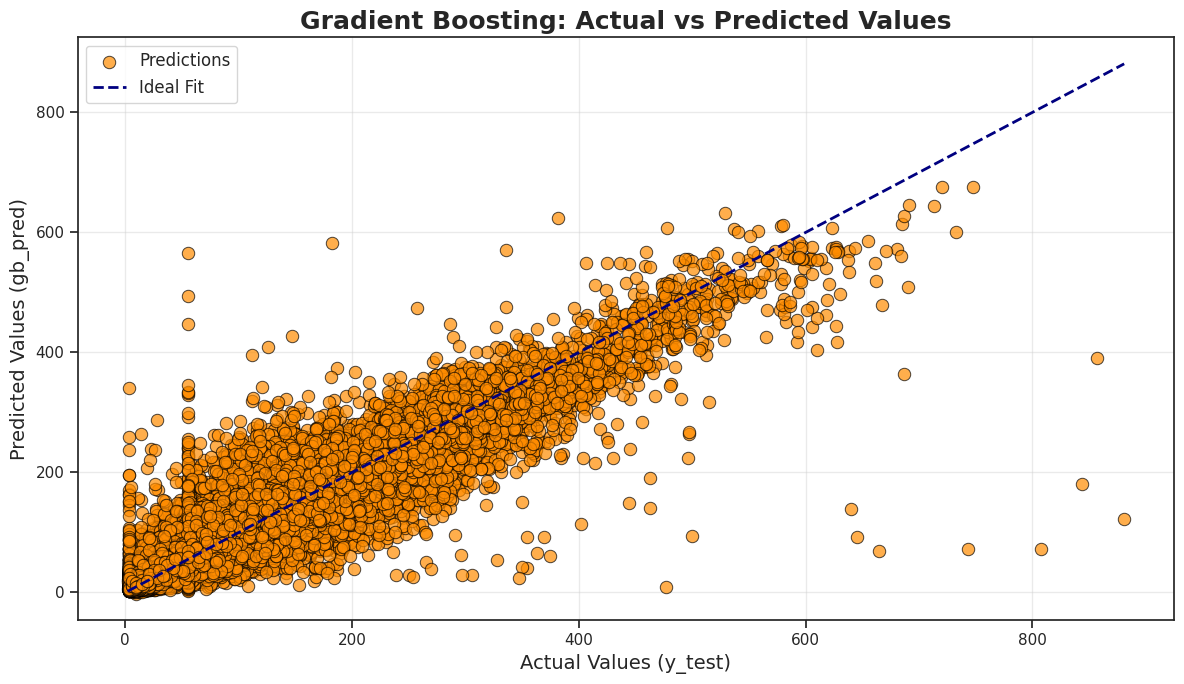

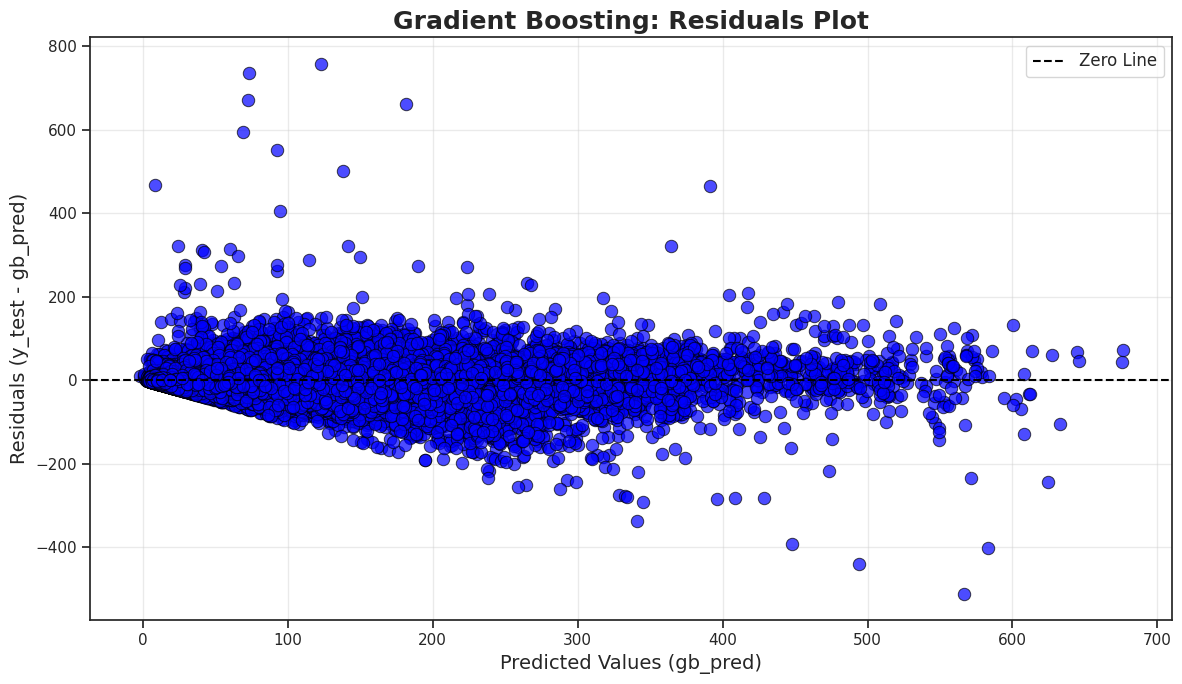

In [44]:
# Set the style for the plots to "ticks" for a cleaner look with ticks on the axes
sns.set_theme(style="ticks")

# Plotting Actual vs Predicted Values for the Gradient Boosting Model
plt.figure(figsize=(12, 7))

# Scatterplot of Actual vs Predicted values, with customized colors, point size, and transparency
sns.scatterplot(x=y_test, y=gb_pred, color='darkorange', s=80, alpha=0.7, edgecolor='black', label='Predictions')

# Adding a line representing the Ideal Fit, where the actual values equal the predicted values (y=x line)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='navy', lw=2, linestyle='--', label='Ideal Fit')

# Adding plot title and labels with specific font sizes and styles
plt.title('Gradient Boosting: Actual vs Predicted Values', fontsize=18, fontweight='bold')
plt.xlabel('Actual Values (y_test)', fontsize=14)
plt.ylabel('Predicted Values (gb_pred)', fontsize=14)

# Adding a legend and setting font size for the legend
plt.legend(fontsize=12, loc='upper left')

# Display gridlines with some transparency for easier readability
plt.grid(alpha=0.4)

# Adjust layout to make sure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()

# Plotting Residuals for the Gradient Boosting Model
gb_residuals = y_test - gb_pred  # Calculate residuals (difference between actual and predicted values)

plt.figure(figsize=(12, 7))

# Instead of using seaborn's residplot, manually plot residuals using a scatterplot
sns.scatterplot(x=gb_pred, y=gb_residuals, color='blue', alpha=0.7, edgecolor='black', s=80)

# Adding a horizontal line at y=0 to show the "ideal" residuals
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, label='Zero Line')

# Adding title and axis labels
plt.title('Gradient Boosting: Residuals Plot', fontsize=18, fontweight='bold')
plt.xlabel('Predicted Values (gb_pred)', fontsize=14)
plt.ylabel('Residuals (y_test - gb_pred)', fontsize=14)

# Adding legend and setting font size for the legend
plt.legend(fontsize=12, loc='upper right')

# Display gridlines with some transparency for easier readability
plt.grid(alpha=0.4)

# Adjust layout to make sure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


In [45]:
# Install Pyngrok, which allows you to expose your local application (such as a Streamlit app) to the web.
!pip install streamlit

# Install Pyngrok, which allows you to expose your local application (such as a Streamlit app) to the web.
!pip install pyngrok

# Install Streamlit again with the '-q' flag, which suppresses unnecessary output during installation.
!pip install streamlit -q

In [46]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

#Page Config & Style
st.set_page_config(page_title="Air Quality Dashboard", layout="wide")

#Custom CSS for styling the app
st.markdown("""
    <style>
        .main { background-color: #f0f2f6; }
        h1, h2, h3 { color: #003366; }
        .stSlider > div > div { background: #e0f7fa; }
    </style>
""", unsafe_allow_html=True)


#Load Dataset
@st.cache_data
def load_data():
    try:
        data = pd.read_csv("merged_dataset.csv")
        numeric_cols = data.select_dtypes(include=['number']).columns
        data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
        return data
    except FileNotFoundError:
        st.error("🚫 File 'merged_dataset.csv' not found. Please upload the dataset.")
        return None


#Sidebar Navigation
st.sidebar.title("🔍 Navigation")
page = st.sidebar.radio("Go to", ["📊 Data Overview", "📈 EDA", "🤖 Modeling & Prediction"])


#Data Overview Page
def render_data_overview(data):
    st.title("📊 Dataset Overview")
    st.markdown("A quick look at the structure and summary of the air quality dataset.")

    # Dataset preview
    with st.expander("📁 Dataset Preview"):
        st.dataframe(data.head())

    # Data types and summary statistics
    with st.expander("📋 Data Types"):
        st.write(data.dtypes)

    with st.expander("📈 Summary Statistics"):
        st.write(data.describe())


#EDA Page
def render_eda(data):
    st.title("📈 Exploratory Data Analysis")
    st.markdown("Analyze PM2.5 patterns, weather conditions, and correlations.")

    # Filter data by year
    year_range = st.slider("📅 Filter by Year", 2013, 2017, (2013, 2017))
    filtered = data[(data['year'] >= year_range[0]) & (data['year'] <= year_range[1])]
    st.markdown(f"Showing data between **{year_range[0]} - {year_range[1]}**")

    # Tabs for different EDA visualizations
    tabs = st.tabs(["📦 PM2.5 Distribution", "🌡️ PM2.5 vs Temperature", "🧮 Correlation Heatmap"])

    # PM2.5 Level Distribution
    with tabs[0]:
        bins = [0, 25, 50, 75, 100, 150, 200, 300]
        labels = ['0-25', '25-50', '50-75', '75-100', '100-150', '150-200', '200-300']
        data['PM2.5_Binned'] = pd.cut(data['PM2.5'], bins=bins, labels=labels)
        bin_counts = data['PM2.5_Binned'].value_counts(sort=False)

        fig, ax = plt.subplots(figsize=(8, 6))
        bin_counts.plot(kind='bar', color='#29b6f6', edgecolor='black', ax=ax)
        ax.set_title("PM2.5 Level Distribution")
        ax.set_xlabel("PM2.5 Bins (µg/m³)")
        ax.set_ylabel("Count")
        st.pyplot(fig)

    # PM2.5 vs Temperature
    with tabs[1]:
        fig, ax = plt.subplots(figsize=(10, 6))
        hb = ax.hexbin(data['TEMP'].fillna(0), data['PM2.5'].fillna(0), gridsize=30, cmap='coolwarm', mincnt=1)
        plt.colorbar(hb, ax=ax, label='Count')
        ax.set_xlabel("Temperature (°C)")
        ax.set_ylabel("PM2.5 (µg/m³)")
        ax.set_title("Hexbin: PM2.5 vs Temperature")
        st.pyplot(fig)

    # Correlation Heatmap
    with tabs[2]:
        corr = filtered.select_dtypes(include=['number']).corr()
        fig, ax = plt.subplots(figsize=(12, 8))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis", ax=ax, linewidths=0.5)
        ax.set_title("Correlation Heatmap")
        st.pyplot(fig)


#Modeling Page
def render_modeling(data):
    st.title("🤖 Modeling & Prediction")
    st.markdown("Using machine learning to predict **PM2.5** based on other features.")

    # Features and target variable
    features = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
    target = 'PM2.5'

    X = data[features].select_dtypes(include=['float64', 'int64'])
    y = data[target]

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Choose the model
    model_choice = st.radio("Choose Model", ["Linear Regression", "Gradient Boosting"])

    # Train and evaluate the chosen model
    if model_choice == "Linear Regression":
        model = LinearRegression()
    else:
        model = GradientBoostingRegressor(random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    st.metric(label="Mean Squared Error", value=f"{mse:.2f}")
    st.metric(label="R-squared Score", value=f"{r2:.2f}")

    # Plot Actual vs Predicted
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.regplot(x=y_test, y=y_pred, ax=ax, scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
    ax.set_title(f"{model_choice}: Actual vs Predicted")
    ax.set_xlabel("Actual PM2.5")
    ax.set_ylabel("Predicted PM2.5")
    st.pyplot(fig)


#Main App
data = load_data()
if data is not None:
    if page == "📊 Data Overview":
        render_data_overview(data)
    elif page == "📈 EDA":
        render_eda(data)
    elif page == "🤖 Modeling & Prediction":
        render_modeling(data)


Overwriting app.py


In [47]:
# Using wget to fetch the public IPv4 address of the system
!wget -q -O - ipv4.icanhazip.com

35.223.194.65


In [ ]:
# Running the Streamlit app in the background
!streamlit run /content/drive/MyDrive/CMP7005/app.py

# Exposing the Streamlit app running on port 8501 to the web using LocalTunnel
!npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.223.194.65:8501

  Stopping...
^C
⠙⠹⠸⠼⠴your url is: https://loud-colts-add.loca.lt


In [51]:
#Kill any existing services
!pkill -f streamlit
!pkill -f lt



In [52]:
#Start fresh
!nohup streamlit run air_quality_app.py &>/dev/null&
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴your url is: https://warm-paths-peel.loca.lt
^C
